In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df = pd.read_csv("twitter_human_bots_dataset.csv", index_col=0)

In [159]:
df.head(10)

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human
5,2016-11-21 22:50:30,True,False,لا إله إلا الله . فعل التنبيهات 🌷🎖عادل ...حساب...,237,27394,542,False,800833795234611200,ar,مكة المكرمة,NaN,http://pbs.twimg.com/profile_images/1273524501...,Ayat_140,11513,False,8.428,1366,bot
6,2009-07-08 22:22:59,False,False,"Co-Host of @TheTalkCBS, Judge on @DancingABC, ...",5522,291529,1581,True,55050269,en,Los Angeles,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1275104892...,carrieanninaba,14535,True,3.581,4059,human
7,2012-09-07 20:01:33,False,False,Internationally-acclaimed Egyptian Singer.,756,6909959,40,False,809500704,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1243989369...,sherine,1223,True,0.421,2902,human
8,2012-12-16 11:43:24,True,False,NaN,64,24,0,False,1015021614,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/6114933021...,cordensmaureen,277,False,0.099,2802,human
9,2012-02-14 15:33:48,False,False,Man Utd fan. mostly here for football. Takes p...,36384,2130,3363,True,492306486,en,United Kingdom,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/1211318786...,GhamGraham,63376,False,20.391,3108,human


In [160]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37438 entries, 0 to 37437
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    37438 non-null  object 
 1   default_profile               37438 non-null  bool   
 2   default_profile_image         37438 non-null  bool   
 3   description                   30182 non-null  object 
 4   favourites_count              37438 non-null  int64  
 5   followers_count               37438 non-null  int64  
 6   friends_count                 37438 non-null  int64  
 7   geo_enabled                   37438 non-null  bool   
 8   id                            37438 non-null  int64  
 9   lang                          29481 non-null  object 
 10  location                      37435 non-null  object 
 11  profile_background_image_url  32939 non-null  object 
 12  profile_image_url             37437 non-null  object 
 13  s

In [161]:
# check for missing values in columns
print(df.isnull().sum())

created_at                         0
default_profile                    0
default_profile_image              0
description                     7256
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            7957
location                           3
profile_background_image_url    4499
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
account_type                       0
dtype: int64


In [162]:
# check for duplicated rows
print(df.duplicated().sum())

0


## EDA

In [163]:
df['lang'].info()
df['lang'].value_counts().head(10)

<class 'pandas.core.series.Series'>
Int64Index: 37438 entries, 0 to 37437
Series name: lang
Non-Null Count  Dtype 
--------------  ----- 
29481 non-null  object
dtypes: object(1)
memory usage: 585.0+ KB


en    21450
es     1213
pt      704
it      637
ar      594
de      536
ja      378
fr      375
af      333
id      313
Name: lang, dtype: int64

In [164]:
df['lang'].isna().sum()

7957

In [165]:
print(df['lang'].value_counts(dropna=False, normalize=True).head(10) * 100)

en     57.294727
NaN    21.253806
es      3.240024
pt      1.880442
it      1.701480
ar      1.586623
de      1.431700
ja      1.009669
fr      1.001656
af      0.889471
Name: lang, dtype: float64


In [177]:
# fill NaN with unknown
df['lang'] = df['lang'].fillna('unknown')

# only plot top 15 languages, group the rest into others
top_languages = df['lang'].value_counts().nlargest(15).index
df['lang_grouped'] = df['lang'].apply(lambda x: x if x in top_languages else 'others')

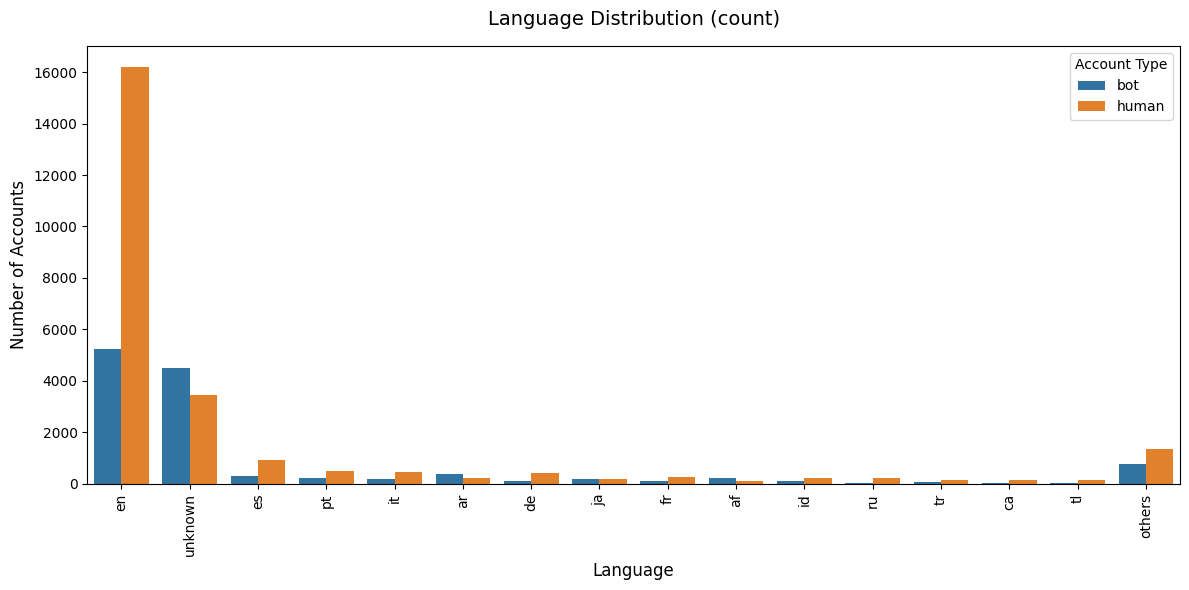

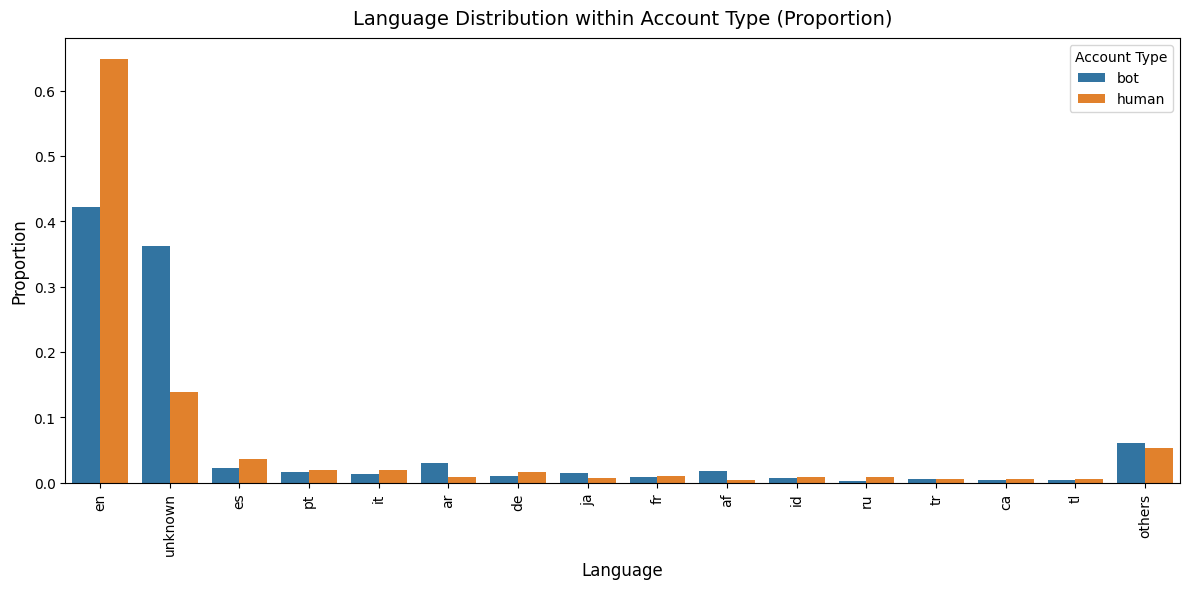

In [182]:
# counts
lang_counts = (
    df.groupby(['lang_grouped', 'account_type'])
    .size()
    .reset_index(name='count')
)

lang_order = (
    df['lang_grouped'].value_counts()
    .sort_values(ascending=False)
    .index.tolist()
)
if 'others' in lang_order:
    lang_order = [lang for lang in lang_order if lang != 'others'] + ['others']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lang_counts,
    x='lang_grouped', y='count', hue='account_type',
    order=lang_order,
    dodge=True
)
plt.title("Language Distribution (count)", fontsize=14, pad=15)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Number of Accounts", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Account Type", loc='upper right')
plt.tight_layout()
plt.show()

# proportions 
lang_distribution = (
    df.groupby('account_type')['lang_grouped']
    .value_counts(normalize=True)
    .reset_index(name='proportion')
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=lang_distribution,
    x='lang_grouped', y='proportion',
    hue='account_type',
    order=lang_order,
    dodge=True
)

plt.title("Language Distribution within Account Type (Proportion)", fontsize=14, pad=10)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Account Type", loc='upper right')
plt.tight_layout()
plt.show()


In [168]:
lang_distribution = (
    df.groupby('account_type')['lang_grouped']
    .value_counts(normalize=True)
    .reset_index(name='proportion')
)

lang_table = (
    lang_distribution
    .pivot(index='lang_grouped', columns='account_type', values='proportion')
    .fillna(0)
)

lang_table = lang_table.round(3)

if 'bot' in lang_table.columns:
    lang_table = lang_table.sort_values(by='bot', ascending=False)

print("Language Distribution Table (Proportion within account types)")
print(lang_table)


Language Distribution Table (Proportion within account types)
account_type    bot  human
lang_grouped              
en            0.422  0.648
unknown       0.362  0.138
Others        0.060  0.054
ar            0.030  0.009
es            0.023  0.037
af            0.017  0.005
pt            0.017  0.020
ja            0.015  0.008
it            0.014  0.019
de            0.010  0.016
fr            0.008  0.011
id            0.008  0.009
tr            0.005  0.006
ca            0.004  0.006
tl            0.004  0.006
ru            0.002  0.009


English dominates 64.8% of human accounts, indicating that majority of humans use an English account.

Meanwhile, bots show a more even split between English (42.2%) and the 'unknown' category (36.2%), indicating that many bots either use English accounts or do not specify a language for their accounts.

More than 75% of both humans and bots account are using either an English or one with unspecified language. 

Certain languages such as Arabic (ar, 3.0%) and Afrikaans (af, 1.7%) are proportionally higher among bots than humans, which might suggest region-specific bot activity or automated accounts using less common languages. However, these proportions are relatively small, and may not be significant enough to draw conclusions.

In [169]:
lang_distribution = (
    df.groupby(['account_type', 'lang_grouped'])
    .size()
    .reset_index(name='count')
)

lang_table = (
    lang_distribution
    .pivot(index='lang_grouped', columns='account_type', values='count')
    .fillna(0)
    .astype(int)
)

if 'bot' in lang_table.columns:
    lang_table = lang_table.sort_values(by='bot', ascending=False)

lang_table['total'] = lang_table.sum(axis=1)

if 'bot' in lang_table.columns:
    lang_table['bot_%'] = (lang_table['bot'] / lang_table['total'] * 100).round(2)
if 'human' in lang_table.columns:
    lang_table['human_%'] = (lang_table['human'] / lang_table['total'] * 100).round(2)

if 'bot_%' in lang_table.columns and 'human_%' in lang_table.columns:
    lang_table['bot_dominance'] = (lang_table['bot_%'] - lang_table['human_%']).round(2)

print("Language Distribution Table:\n")
print(lang_table.sort_values(by='total', ascending=False))


Language Distribution Table:

account_type   bot  human  total  bot_%  human_%  bot_dominance
lang_grouped                                                   
en            5238  16212  21450  24.42    75.58         -51.16
unknown       4493   3464   7957  56.47    43.53          12.94
Others         748   1340   2088  35.82    64.18         -28.36
es             287    926   1213  23.66    76.34         -52.68
pt             206    498    704  29.26    70.74         -41.48
it             168    469    637  26.37    73.63         -47.26
ar             378    216    594  63.64    36.36          27.28
de             125    411    536  23.32    76.68         -53.36
ja             187    191    378  49.47    50.53          -1.06
fr             104    271    375  27.73    72.27         -44.54
af             214    119    333  64.26    35.74          28.52
id              97    216    313  30.99    69.01         -38.02
ru              27    223    250  10.80    89.20         -78.40
tr        

English (en) has 5,238 bots vs 16,212 humans, giving a bot_% of 24.42% and human_% of 75.58%, resulting in a strong human dominance (-51.16%).

The 'unknown' category is bot dominated, with 4,493 bots vs 3,464 humans (bot_dominance = +12.94%).

Arabic (ar) and Afrikaans (af) show positive bot dominance, indicating these languages are disproportionately used by bots compared to humans. Languages like Spanish (es), Portuguese (pt) and Italian (it) have strong negative bot dominance, reflecting human prevalance. These languages may be key differentiators between bots and humans. 

Above shows that English dominates human accounts (64.8%), while a large proportion of bots (36.2%) have no specified language set. Together, more than 75% of all accounts, both human and bot, use either English or an unspecified language, highlighting that these two categories cover the majority of the accounts. 

Certain less common languages such as Arabic (ar, 3.0%) and Afrikaans (af, 1.7%) appear proportionally more among bots than humans, even though their absolute counts are relatively small. Our table confirms these patterns, showing that 'unknown' and some niche languages are bot-heavy, whereas English, Spanish, Portuguese, and Italian are predominantly human. These observations provide an initial overview of language distributions across account types and may be able to guide further analysis.

## Others (Ignore)

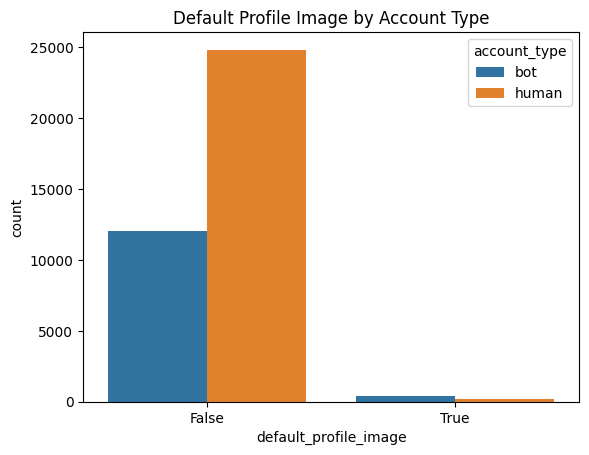

account_type
bot      0.030825
human    0.006996
Name: default_profile_image, dtype: float64

In [170]:
sns.countplot(x='default_profile_image', hue='account_type', data=df)
plt.title("Default Profile Image by Account Type")
plt.show()

df.groupby('account_type')['default_profile_image'].mean()

Bots are more likely to have default profile pictures than humans.

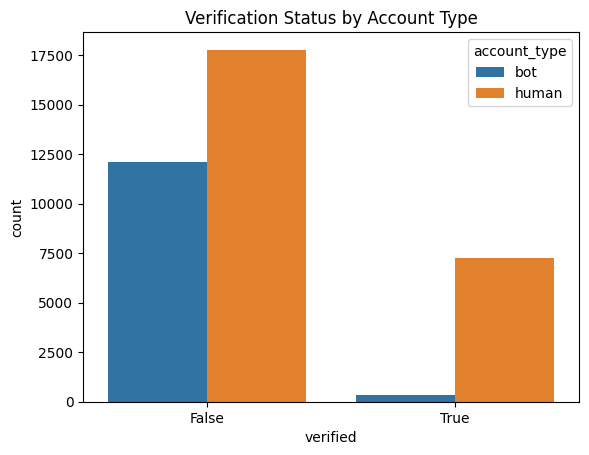

account_type
bot      0.025433
human    0.289250
Name: verified, dtype: float64

In [171]:
sns.countplot(x='verified', hue='account_type', data=df)
plt.title("Verification Status by Account Type")
plt.show()

df.groupby('account_type')['verified'].mean()

Bots are more likely to have unverified account 

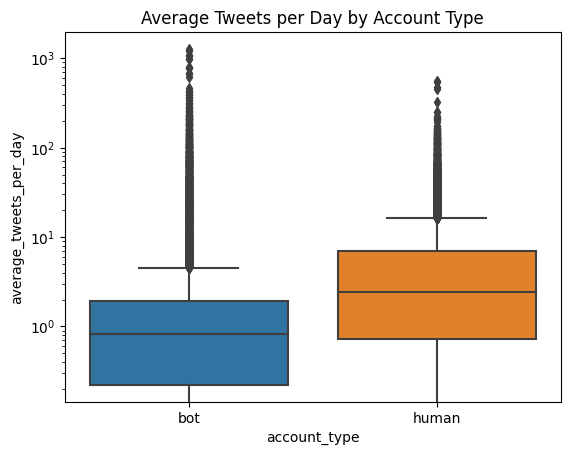

In [172]:
sns.boxplot(x='account_type', y='average_tweets_per_day', data=df)
plt.yscale('log')  # optional, if very skewed
plt.title("Average Tweets per Day by Account Type")
plt.show()


Bots post less tweets per day 

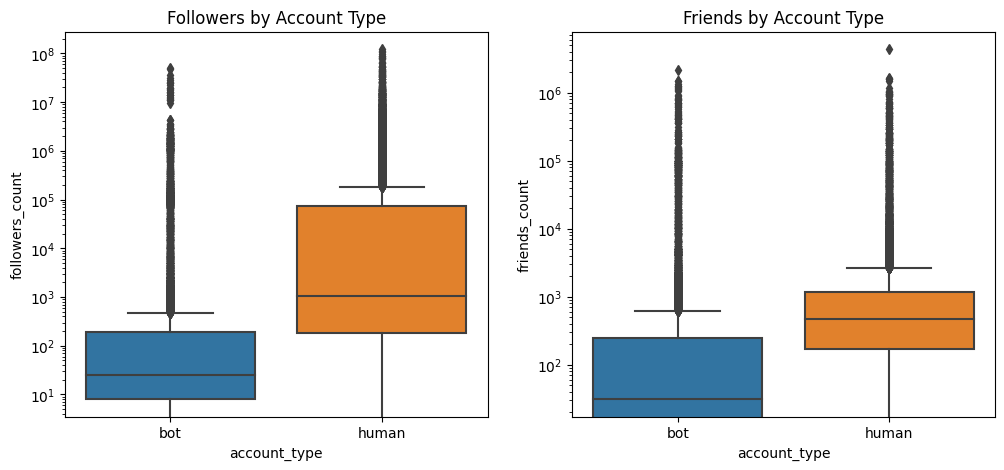

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='account_type', y='followers_count', data=df, ax=axes[0])
sns.boxplot(x='account_type', y='friends_count', data=df, ax=axes[1])
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_title('Followers by Account Type')
axes[1].set_title('Friends by Account Type')
plt.show()


Bots have lesser followers and friends 

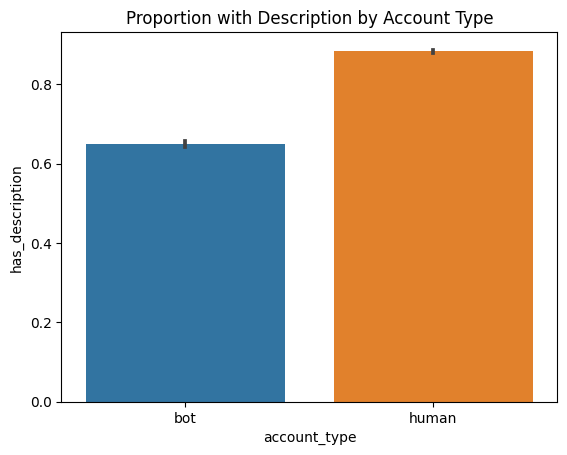

In [174]:
df['has_description'] = df['description'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else 1)

sns.barplot(x='account_type', y='has_description', data=df)
plt.title("Proportion with Description by Account Type")
plt.show()

Bots are less likely to have Description in their profile 